# FIXED DEPOSIT SUBSCRIPTION PREDICTION

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the  train dataset
df=pd.read_csv('Bank_marketing.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [4]:
df.head(15)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [5]:
df.tail(15)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31632,5195,33,blue-collar,married,secondary,no,0,yes,no,unknown,21,may,521,3,-1,0,unknown,yes
31633,9847,50,technician,married,tertiary,no,3117,no,no,unknown,9,jun,174,1,-1,0,unknown,no
31634,8652,30,technician,single,tertiary,no,432,yes,yes,unknown,3,jun,180,3,-1,0,unknown,no
31635,41379,35,management,married,tertiary,no,4,no,no,cellular,1,sep,157,2,-1,0,unknown,no
31636,20954,48,housemaid,married,primary,no,469,no,no,cellular,14,aug,103,2,-1,0,unknown,no
31637,20110,44,technician,married,secondary,no,5163,no,no,cellular,11,aug,48,2,-1,0,unknown,no
31638,16309,29,blue-collar,married,secondary,no,721,yes,no,cellular,23,jul,644,1,-1,0,unknown,no
31639,279,38,services,single,secondary,no,570,yes,no,unknown,5,may,75,2,-1,0,unknown,no
31640,12109,43,management,single,secondary,no,2968,no,no,unknown,20,jun,30,4,-1,0,unknown,no
31641,9476,37,technician,single,tertiary,no,1309,no,no,unknown,6,jun,442,2,-1,0,unknown,no


In [6]:
df.shape

(31647, 18)

In this dataset there are 31647 rows and 18 columns.

In [7]:
# To see columns in a list
df.columns.tolist()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

Changing the column name for better understanding

In [8]:
df.columns=['ID',
 'Age',
 'Job',
 'Marital Status',
 'Education',
 'Credit Default',
 'Balance',
 'Housing loan',
 'Personal loan',
 'Type of Contact',
 'Day',
 'Month',
 'Duration of contact',
 'No. of Contacts',
 'Pdays',
 'Previous Contacts',
 'Outcome',
 'Subscribed']

In [9]:
df.head(5)

,ID,Age,Job,Marital Status,Education,Credit Default,Balance,Housing loan,Personal loan,Type of Contact,Day,Month,Duration of contact,No. of Contacts,Pdays,Previous Contacts,Outcome,Subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [10]:
df.dtypes

ID                      int64
Age                     int64
Job                    object
Marital Status         object
Education              object
Credit Default         object
Balance                 int64
Housing loan           object
Personal loan          object
Type of Contact        object
Day                     int64
Month                  object
Duration of contact     int64
No. of Contacts         int64
Pdays                   int64
Previous Contacts       int64
Outcome                object
Subscribed             object
dtype: object

In [11]:
for i in df.columns:
    if(df[i].dtype==object):
        print(i,"\n")
        print(df[i].value_counts(),"\n")

Job 

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: Job, dtype: int64 

Marital Status 

married     19095
single       8922
divorced     3630
Name: Marital Status, dtype: int64 

Education 

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: Education, dtype: int64 

Credit Default 

no     31062
yes      585
Name: Credit Default, dtype: int64 

Housing loan 

yes    17584
no     14063
Name: Housing loan, dtype: int64 

Personal loan 

no     26516
yes     5131
Name: Personal loan, dtype: int64 

Type of Contact 

cellular     20423
unknown       9177
telephone     2047
Name: Type of Contact, dtype: int64 

Month 

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
m

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   31647 non-null  int64 
 1   Age                  31647 non-null  int64 
 2   Job                  31647 non-null  object
 3   Marital Status       31647 non-null  object
 4   Education            31647 non-null  object
 5   Credit Default       31647 non-null  object
 6   Balance              31647 non-null  int64 
 7   Housing loan         31647 non-null  object
 8   Personal loan        31647 non-null  object
 9   Type of Contact      31647 non-null  object
 10  Day                  31647 non-null  int64 
 11  Month                31647 non-null  object
 12  Duration of contact  31647 non-null  int64 
 13  No. of Contacts      31647 non-null  int64 
 14  Pdays                31647 non-null  int64 
 15  Previous Contacts    31647 non-null  int64 
 16  Outc

<Axes: >

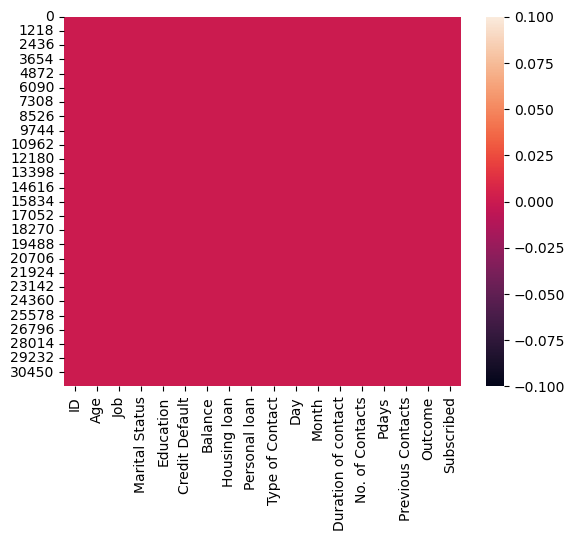

In [13]:
# Lets see using heatmap
sns.heatmap(df.isnull())

Here, we can see that no null values are present.

In [14]:
df.describe()

,ID,Age,Balance,Day,Duration of contact,No. of Contacts,Pdays,Previous Contacts
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Data Visualisation

no     27932
yes     3715
Name: Subscribed, dtype: int64

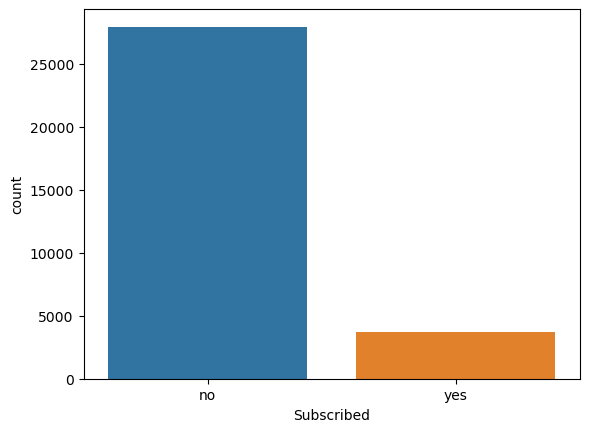

In [15]:
sns.countplot(x='Subscribed', data =df)
df['Subscribed'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: Job, dtype: int64

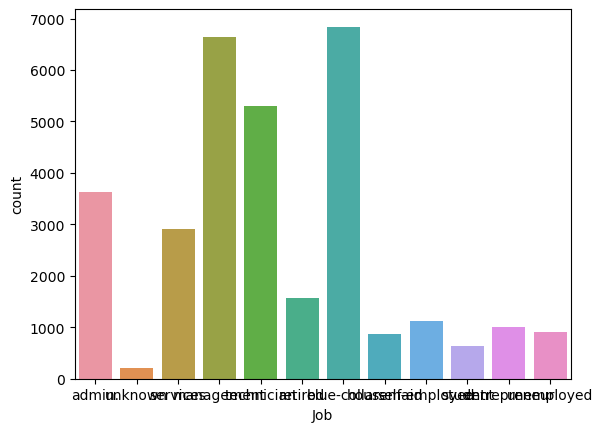

In [16]:
sns.countplot(x='Job', data =df)
df['Job'].value_counts()

married     19095
single       8922
divorced     3630
Name: Marital Status, dtype: int64

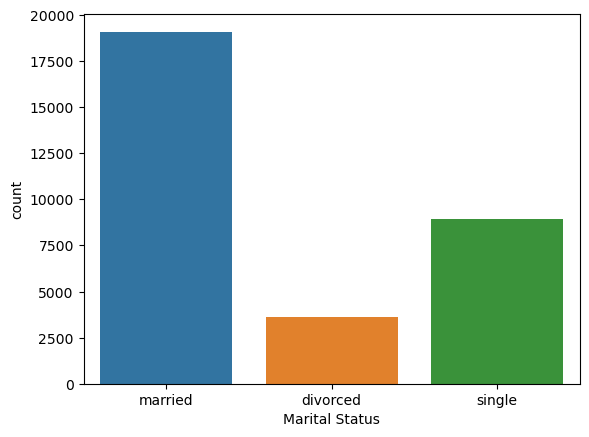

In [17]:
sns.countplot(x='Marital Status', data =df)
df['Marital Status'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: Education, dtype: int64

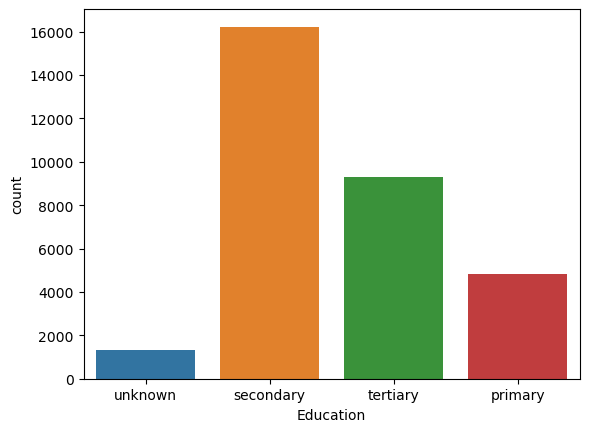

In [18]:
sns.countplot(x='Education', data =df)
df['Education'].value_counts()

no     31062
yes      585
Name: Credit Default, dtype: int64

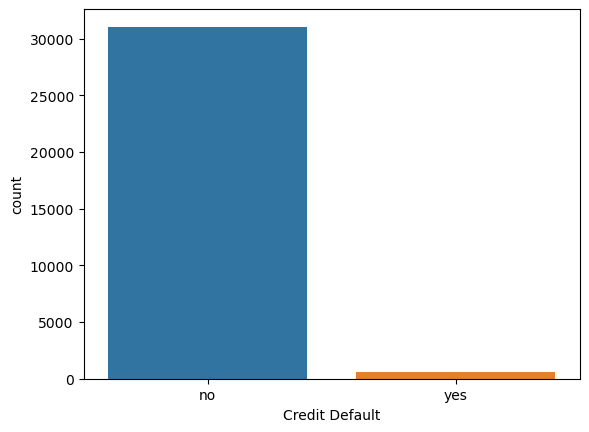

In [19]:
sns.countplot(x='Credit Default', data =df)
df['Credit Default'].value_counts()

yes    17584
no     14063
Name: Housing loan, dtype: int64

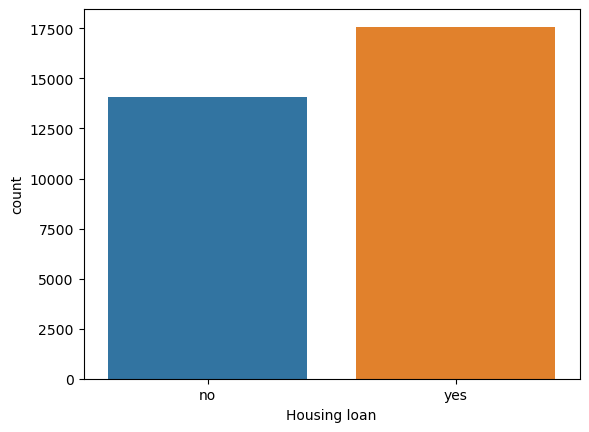

In [20]:
sns.countplot(x='Housing loan', data =df)
df['Housing loan'].value_counts()

no     26516
yes     5131
Name: Personal loan, dtype: int64

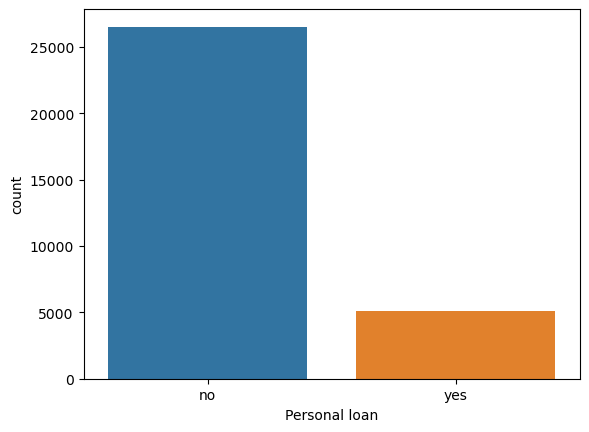

In [21]:
sns.countplot(x='Personal loan', data =df)
df['Personal loan'].value_counts()

cellular     20423
unknown       9177
telephone     2047
Name: Type of Contact, dtype: int64

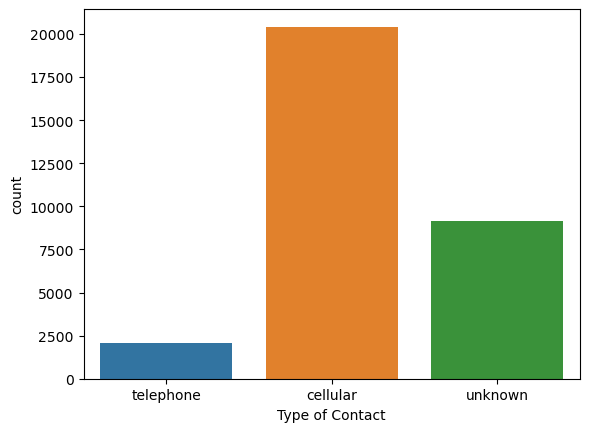

In [22]:
sns.countplot(x='Type of Contact', data =df)
df['Type of Contact'].value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: Outcome, dtype: int64

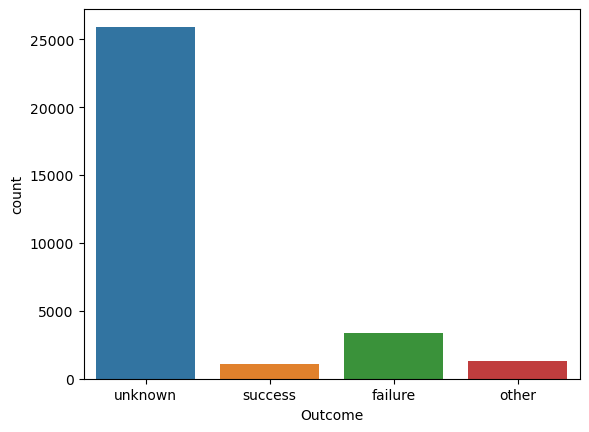

In [23]:
sns.countplot(x='Outcome', data =df)
df['Outcome'].value_counts()

In [24]:
df.columns

Index(['ID', 'Age', 'Job', 'Marital Status', 'Education', 'Credit Default',
       'Balance', 'Housing loan', 'Personal loan', 'Type of Contact', 'Day',
       'Month', 'Duration of contact', 'No. of Contacts', 'Pdays',
       'Previous Contacts', 'Outcome', 'Subscribed'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Density'>

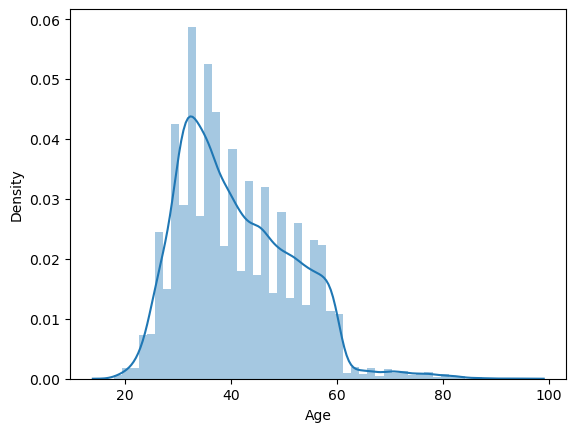

In [25]:
sns.distplot(df['Age'])

<Axes: xlabel='Balance', ylabel='Density'>

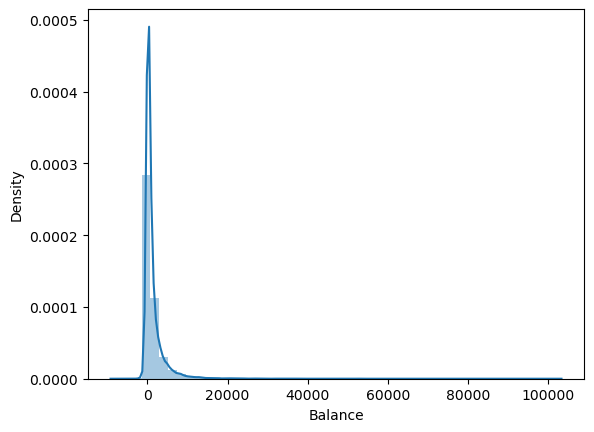

In [26]:
sns.distplot(df['Balance'])

<Axes: xlabel='Duration of contact', ylabel='Density'>

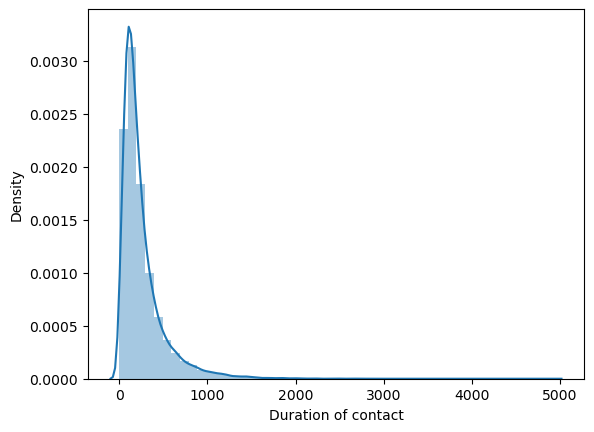

In [27]:
sns.distplot(df['Duration of contact'])

<Axes: xlabel='No. of Contacts', ylabel='Density'>

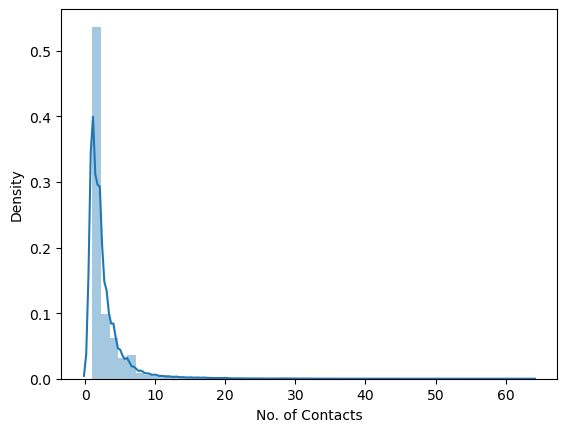

In [28]:
sns.distplot(df['No. of Contacts'])

<Axes: xlabel='Pdays', ylabel='Density'>

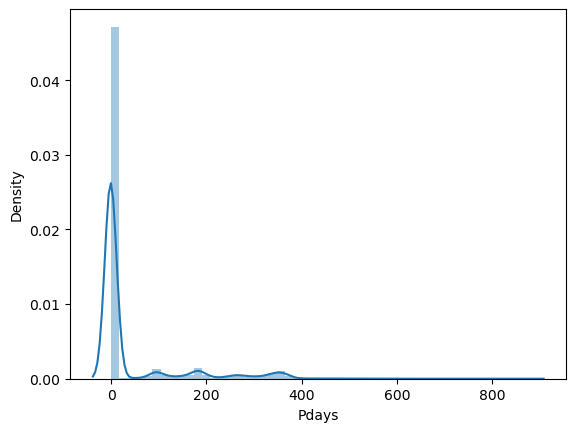

In [29]:
sns.distplot(df['Pdays'])

<Axes: xlabel='Previous Contacts', ylabel='Density'>

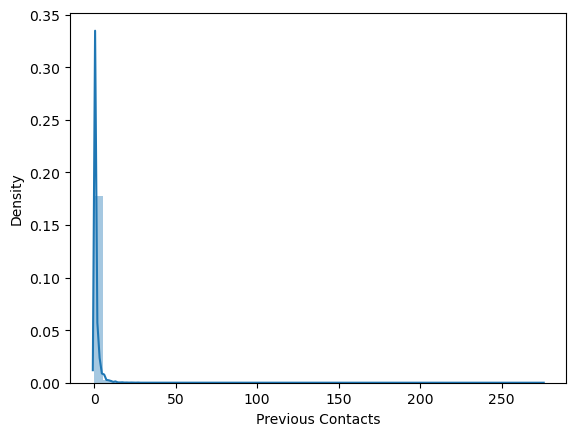

In [30]:
sns.distplot(df['Previous Contacts'])

<Axes: xlabel='Job', ylabel='count'>

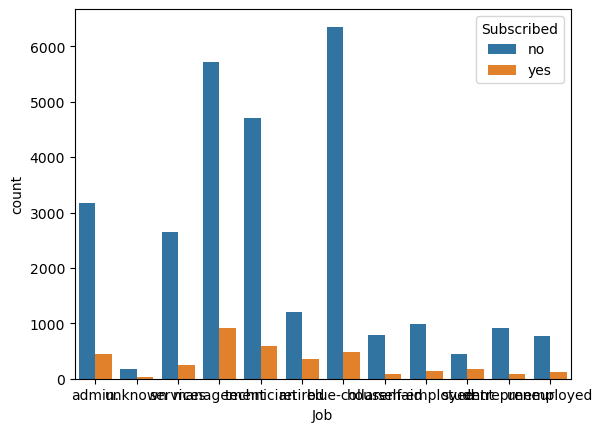

In [31]:
sns.countplot(x='Job',hue='Subscribed',data=df)

In [32]:
df.columns

Index(['ID', 'Age', 'Job', 'Marital Status', 'Education', 'Credit Default',
       'Balance', 'Housing loan', 'Personal loan', 'Type of Contact', 'Day',
       'Month', 'Duration of contact', 'No. of Contacts', 'Pdays',
       'Previous Contacts', 'Outcome', 'Subscribed'],
      dtype='object')

<Axes: xlabel='Marital Status', ylabel='count'>

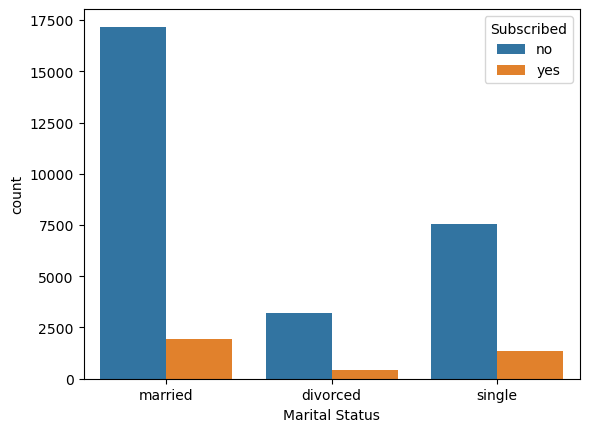

In [33]:
sns.countplot(x='Marital Status',hue='Subscribed',data=df)

<Axes: xlabel='Education', ylabel='count'>

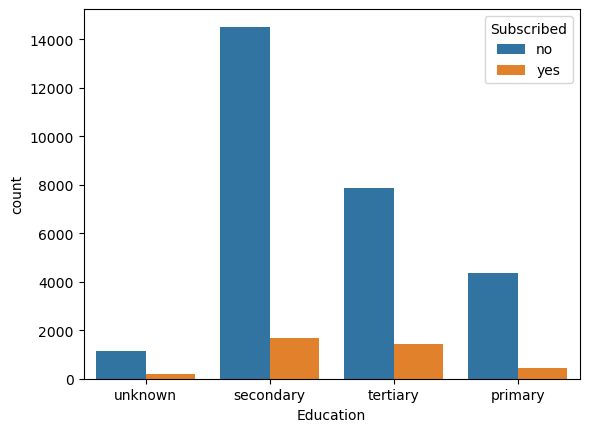

In [34]:
sns.countplot(x='Education',hue='Subscribed',data=df)

<Axes: xlabel='Credit Default', ylabel='count'>

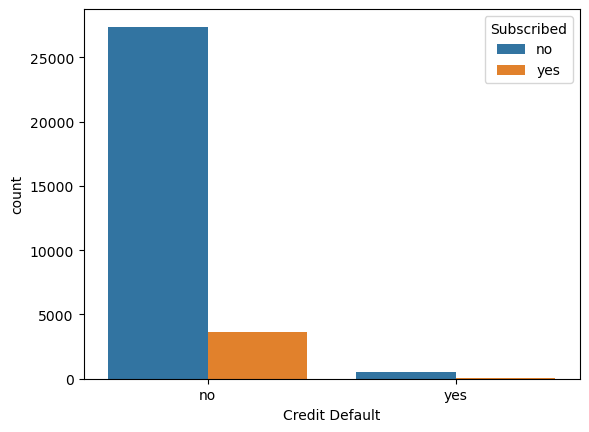

In [35]:
sns.countplot(x='Credit Default',hue='Subscribed',data=df)

<Axes: xlabel='Housing loan', ylabel='count'>

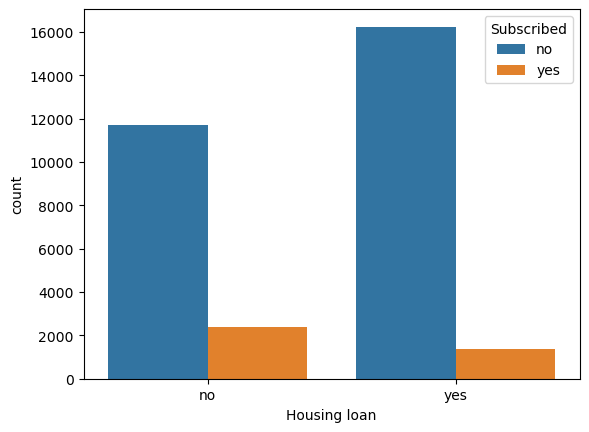

In [36]:
sns.countplot(x='Housing loan',hue='Subscribed',data=df)

<Axes: xlabel='Personal loan', ylabel='count'>

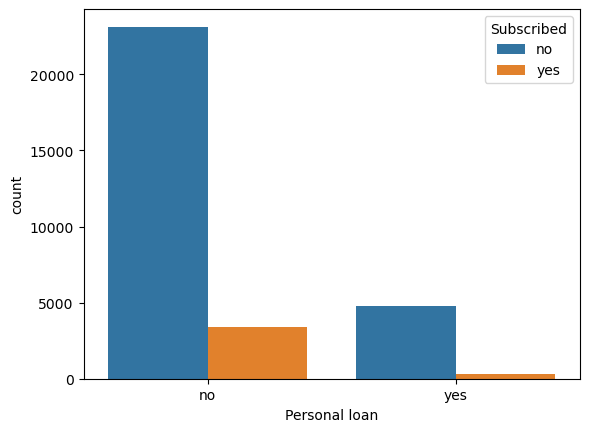

In [37]:
sns.countplot(x='Personal loan',hue='Subscribed',data=df)

<Axes: xlabel='Type of Contact', ylabel='count'>

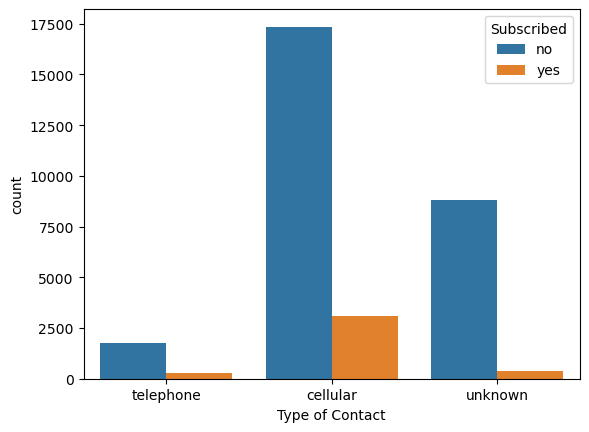

In [38]:
sns.countplot(x='Type of Contact',hue='Subscribed',data=df)

<Axes: xlabel='Outcome', ylabel='count'>

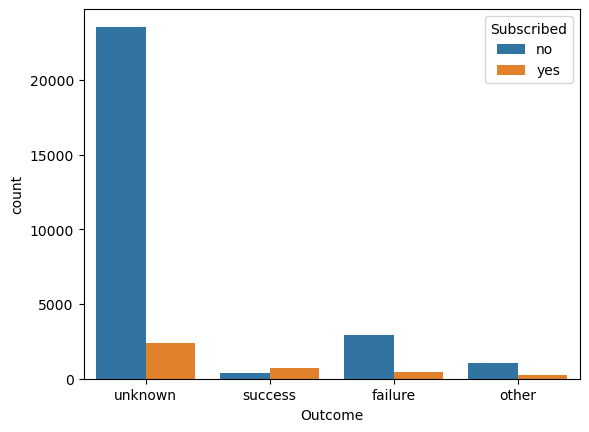

In [39]:
sns.countplot(x='Outcome',hue='Subscribed',data=df)

<Axes: xlabel='Personal loan', ylabel='count'>

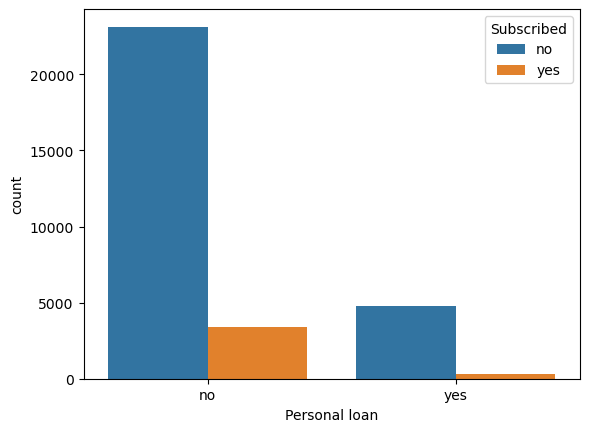

In [40]:
sns.countplot(x='Personal loan',hue='Subscribed',data=df)

In [41]:
df.head(5)

,ID,Age,Job,Marital Status,Education,Credit Default,Balance,Housing loan,Personal loan,Type of Contact,Day,Month,Duration of contact,No. of Contacts,Pdays,Previous Contacts,Outcome,Subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [42]:
df.drop(['ID'],axis=1,inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  31647 non-null  int64 
 1   Job                  31647 non-null  object
 2   Marital Status       31647 non-null  object
 3   Education            31647 non-null  object
 4   Credit Default       31647 non-null  object
 5   Balance              31647 non-null  int64 
 6   Housing loan         31647 non-null  object
 7   Personal loan        31647 non-null  object
 8   Type of Contact      31647 non-null  object
 9   Day                  31647 non-null  int64 
 10  Month                31647 non-null  object
 11  Duration of contact  31647 non-null  int64 
 12  No. of Contacts      31647 non-null  int64 
 13  Pdays                31647 non-null  int64 
 14  Previous Contacts    31647 non-null  int64 
 15  Outcome              31647 non-null  object
 16  Subs

# Encoding categorical column

Converting Categorical column to numerical

In [44]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,Age,Job,Marital Status,Education,Credit Default,Balance,Housing loan,Personal loan,Type of Contact,Day,Month,Duration of contact,No. of Contacts,Pdays,Previous Contacts,Outcome,Subscribed
0,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0.0
1,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0.0
2,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0.0
3,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1.0
4,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0,0.0
31643,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0,1.0
31644,32,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,3.0,0.0
31645,57,9.0,1.0,1.0,0.0,225,1.0,0.0,1.0,15,8.0,22,7,337,12,0.0,0.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  31647 non-null  int64  
 1   Job                  31647 non-null  float64
 2   Marital Status       31647 non-null  float64
 3   Education            31647 non-null  float64
 4   Credit Default       31647 non-null  float64
 5   Balance              31647 non-null  int64  
 6   Housing loan         31647 non-null  float64
 7   Personal loan        31647 non-null  float64
 8   Type of Contact      31647 non-null  float64
 9   Day                  31647 non-null  int64  
 10  Month                31647 non-null  float64
 11  Duration of contact  31647 non-null  int64  
 12  No. of Contacts      31647 non-null  int64  
 13  Pdays                31647 non-null  int64  
 14  Previous Contacts    31647 non-null  int64  
 15  Outcome              31647 non-null 

In [46]:
df['Subscribed'] = df['Subscribed'].astype(int)

In [47]:
df.head(5)

,Age,Job,Marital Status,Education,Credit Default,Balance,Housing loan,Personal loan,Type of Contact,Day,Month,Duration of contact,No. of Contacts,Pdays,Previous Contacts,Outcome,Subscribed
0,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0
1,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0
2,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0
3,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1
4,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0


In [48]:
df.describe()

,Age,Job,Marital Status,Education,Credit Default,Balance,Housing loan,Personal loan,Type of Contact,Day,Month,Duration of contact,No. of Contacts,Pdays,Previous Contacts,Outcome,Subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,4.332923,1.167220,1.225013,0.018485,1363.890258,0.555629,0.162132,0.644642,15.835466,5.533131,258.113534,2.765697,39.576042,0.574272,2.566152,0.117389
std,10.625134,3.271868,0.607186,0.749195,0.134700,3028.304293,0.496904,0.368578,0.899480,8.337097,3.004247,257.118973,3.113830,99.317592,2.422529,0.982069,0.321888
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,2.000000,21.000000,8.000000,318.500000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


Here, we can see that,
 
    1.The dataset looks perfect because it did not have any negative/invalid datas.
    2.The counts are same, so missing/null values.
    3.In "Balance" and 'Duration of contact' columns, mean is greater than median, so Right side skewness.
    4.There is also huge difference between 75% and max in  'Balance' ,'Pdays' and 'Duration of contact'
      columns,so outliers are present. 

In [49]:
df.corr()

,Age,Job,Marital Status,Education,Credit Default,Balance,Housing loan,Personal loan,Type of Contact,Day,Month,Duration of contact,No. of Contacts,Pdays,Previous Contacts,Outcome,Subscribed
Age,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,-0.038368,-0.003870,0.005733,-0.021947,0.005761,0.006466,0.024538
Job,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.002694,0.001469,-0.022552,-0.003032,0.007101,0.038921
Marital Status,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.011544,-0.009394,0.019741,0.012717,-0.019770,0.046043
Education,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.003842,0.006142,-0.001566,0.015280,-0.019007,0.066051
Credit Default,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.010849,0.018538,-0.029622,-0.015877,0.035067,-0.020168
Balance,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.023056,0.024274,-0.012032,0.001789,0.013843,-0.019629,0.050807
Housing loan,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,0.271442,0.003021,-0.021076,0.118790,0.034231,-0.092677,-0.141092
Personal loan,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.012781,0.009340,-0.020078,-0.009258,0.010919,-0.072266
Type of Contact,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.016503,0.022666,-0.245076,-0.141098,0.272083,-0.150051
Day,-0.011056,0.020951,-0.007686,0.017902,0.009996,0.003461,-0.025666,0.014769,-0.027046,1.000000,-0.000604,-0.032288,0.159168,-0.087626,-0.048752,0.077586,-0.029600


<Axes: >

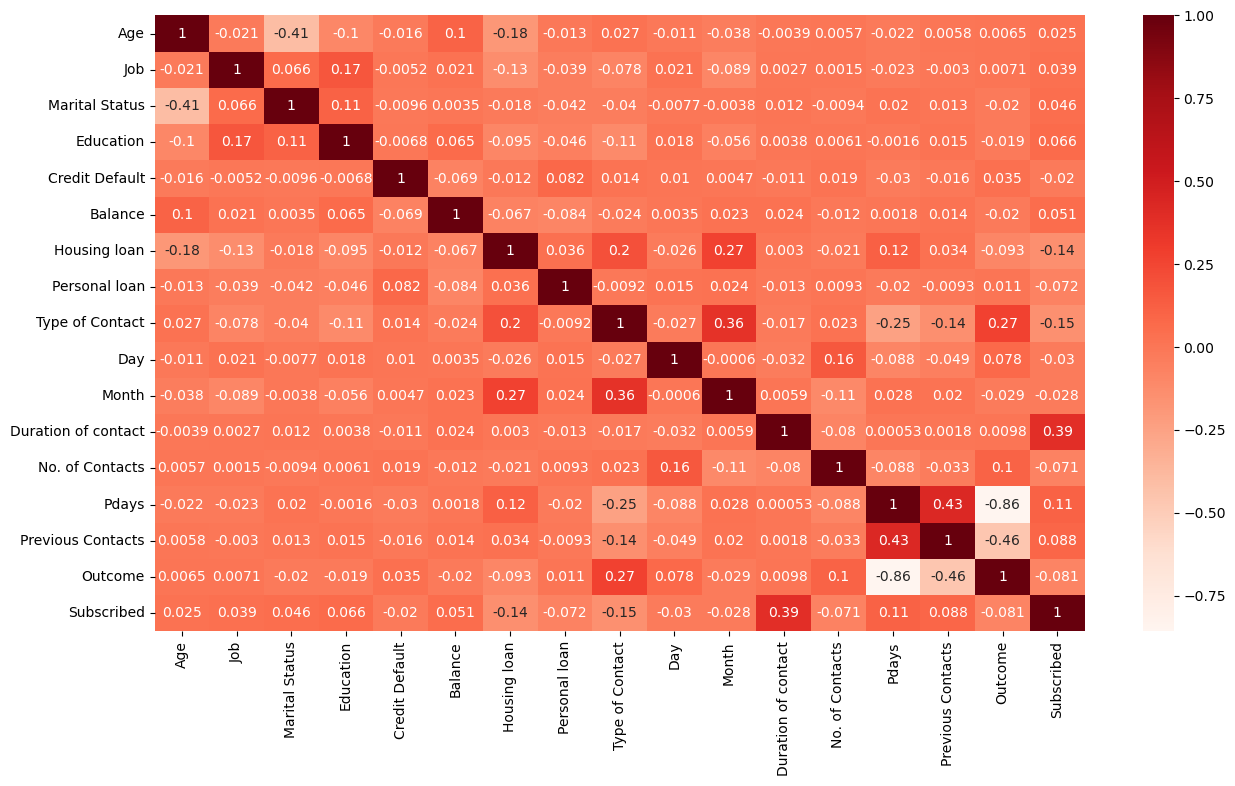

In [50]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='Reds',annot=True)

Here, we can observe that,

    1."Duration of contact" feature has positive correlation with target variable.
    2."Pdays" and "Previous Contacts" have high positive correlation.

# Checking Outliers

Age                        Axes(0.125,0.77;0.227941x0.11)
Job                     Axes(0.398529,0.77;0.227941x0.11)
Marital Status          Axes(0.672059,0.77;0.227941x0.11)
Education                 Axes(0.125,0.638;0.227941x0.11)
Credit Default         Axes(0.398529,0.638;0.227941x0.11)
Balance                Axes(0.672059,0.638;0.227941x0.11)
Housing loan              Axes(0.125,0.506;0.227941x0.11)
Personal loan          Axes(0.398529,0.506;0.227941x0.11)
Type of Contact        Axes(0.672059,0.506;0.227941x0.11)
Day                       Axes(0.125,0.374;0.227941x0.11)
Month                  Axes(0.398529,0.374;0.227941x0.11)
Duration of contact    Axes(0.672059,0.374;0.227941x0.11)
No. of Contacts           Axes(0.125,0.242;0.227941x0.11)
Pdays                  Axes(0.398529,0.242;0.227941x0.11)
Previous Contacts      Axes(0.672059,0.242;0.227941x0.11)
Outcome                    Axes(0.125,0.11;0.227941x0.11)
Subscribed              Axes(0.398529,0.11;0.227941x0.11)
dtype: object

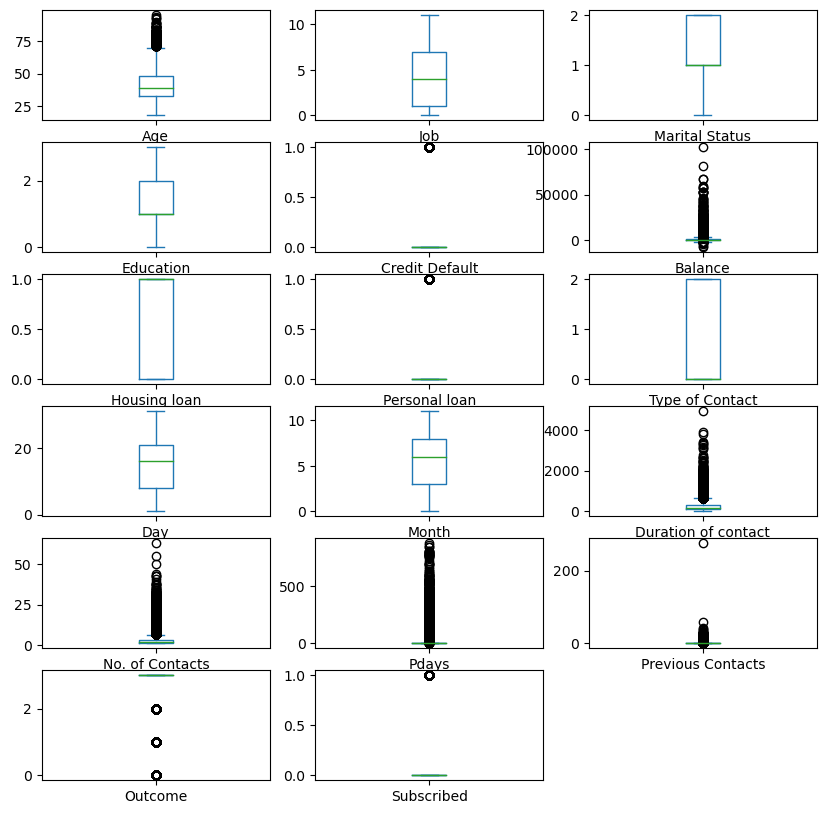

In [51]:
plot = df.plot(kind='box', subplots=True, layout=(6,3), figsize=(10,10))
plot

As we can see outliers are present, we will remove outliers using z score method

In [52]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Age,Job,Marital Status,Education,Credit Default,Balance,Housing loan,Personal loan,Type of Contact,Day,Month,Duration of contact,No. of Contacts,Pdays,Previous Contacts,Outcome,Subscribed
0,1.415793,1.324317,0.275405,2.369229,0.137234,0.187933,1.118201,0.439893,0.395076,0.379579,1.154007,0.832754,0.245906,0.408555,0.237059,0.441777,0.364694
1,0.937156,2.037729,0.275405,0.300345,0.137234,0.449397,1.118201,0.439893,0.716695,0.499526,0.177462,0.649957,0.245906,0.408555,0.237059,0.441777,0.364694
2,1.313627,0.815167,0.275405,0.300345,0.137234,0.156159,0.894294,0.439893,0.716695,0.259631,0.177462,0.070449,0.567059,0.408555,0.237059,0.441777,0.364694
3,1.509911,0.101755,1.922374,1.034442,0.137234,0.635055,1.118201,0.439893,0.716695,0.739422,0.155405,2.368149,0.567059,0.447299,1.001336,0.576498,2.742026
4,0.937156,1.426448,0.275405,0.300345,0.137234,0.411091,0.894294,0.439893,0.716695,1.419637,0.843197,0.474054,0.567059,0.408555,0.237059,0.441777,0.364694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.125392,0.101755,1.371563,1.034442,0.137234,0.450388,0.894294,0.439893,0.716695,0.460055,0.821140,0.552724,0.245906,0.408555,0.237059,0.441777,0.364694
31643,1.133439,0.101755,1.922374,1.034442,0.137234,0.324903,1.118201,2.273280,0.716695,1.299690,0.155405,0.699635,0.245906,0.408555,0.237059,0.441777,2.742026
31644,0.843038,0.101755,1.371563,1.034442,0.137234,0.347358,1.118201,0.439893,0.716695,1.059794,1.508931,0.859979,0.075247,0.408555,0.237059,0.441777,0.364694
31645,1.509911,1.426448,0.275405,0.300345,0.137234,0.376088,0.894294,0.439893,0.395076,0.100212,0.821140,0.918319,1.359859,2.994723,4.716521,2.613048,0.364694


In [53]:
# threshold =3
np.where(z>3)

(array([   10,    21,    26, ..., 31622, 31645, 31646], dtype=int64),
 array([ 4, 12,  5, ..., 13, 14, 11], dtype=int64))

In [54]:
z.iloc[10,4]

7.28679874138403

In [55]:
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Job,Marital Status,Education,Credit Default,Balance,Housing loan,Personal loan,Type of Contact,Day,Month,Duration of contact,No. of Contacts,Pdays,Previous Contacts,Outcome,Subscribed
0,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0
1,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0
2,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0
3,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1
4,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,4.0,2.0,1.0,0.0,2968,0.0,0.0,2.0,20,6.0,30,4,-1,0,3.0,0
31641,37,9.0,2.0,2.0,0.0,1309,0.0,0.0,2.0,6,6.0,442,2,-1,0,3.0,0
31642,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0,0
31643,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0,1


In [56]:
df.shape

(31647, 17)

In [57]:
df_new.shape

(27584, 17)

In [58]:
print("Data loss percentage = ",((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

Data loss percentage =  12.83849969981357


In [59]:
df=df_new
df.shape

(27584, 17)

# Checking Skewness

In [60]:
df.skew()

Age                    0.439159
Job                    0.258302
Marital Status        -0.095968
Education              0.197092
Credit Default         0.000000
Balance                2.433928
Housing loan          -0.207765
Personal loan          1.829242
Type of Contact        0.698882
Day                    0.075854
Month                 -0.469448
Duration of contact    1.596175
No. of Contacts        2.064222
Pdays                  2.799415
Previous Contacts      3.657231
Outcome               -2.449518
Subscribed             2.624756
dtype: float64

# Splitting target variable

In [61]:
x = df.drop("Subscribed", axis = 1)
y= df['Subscribed']

In [62]:
x

,Age,Job,Marital Status,Education,Credit Default,Balance,Housing loan,Personal loan,Type of Contact,Day,Month,Duration of contact,No. of Contacts,Pdays,Previous Contacts,Outcome
0,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0
1,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0
2,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0
3,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0
4,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,4.0,2.0,1.0,0.0,2968,0.0,0.0,2.0,20,6.0,30,4,-1,0,3.0
31641,37,9.0,2.0,2.0,0.0,1309,0.0,0.0,2.0,6,6.0,442,2,-1,0,3.0
31642,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0
31643,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0


In [63]:
y

0        0
1        0
2        0
3        1
4        0
        ..
31640    0
31641    0
31642    0
31643    1
31644    0
Name: Subscribed, Length: 27584, dtype: int32

# To remove biasness, we use Standard scaler method

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Age,Job,Marital Status,Education,Credit Default,Balance,Housing loan,Personal loan,Type of Contact,Day,Month,Duration of contact,No. of Contacts,Pdays,Previous Contacts,Outcome
0,1.519669,-1.322283,-0.279034,2.374747,0.0,0.478677,-1.109257,-0.440582,0.362292,0.375999,1.173570,-1.008776,-0.234092,-0.36472,-0.333465,0.380591
1,-0.957582,2.021767,-0.279034,-0.302260,0.0,-0.640346,-1.109257,-0.440582,-0.734204,0.495243,-0.162960,-0.761553,-0.234092,-0.36472,-0.333465,0.380591
2,-1.353942,0.805749,-0.279034,-0.302260,0.0,-0.125479,0.901504,-0.440582,-0.734204,0.256756,-0.162960,0.022196,-0.751411,-0.36472,-0.333465,0.380591
3,1.618759,-0.106265,-1.932500,1.036243,0.0,1.263732,-1.109257,-0.440582,-0.734204,0.733730,0.171173,3.320254,-0.751411,0.83757,2.513714,-0.757057
4,-0.957582,1.413758,-0.279034,-0.302260,0.0,-0.573088,0.901504,-0.440582,-0.734204,-1.412654,-0.831225,0.758604,-0.751411,-0.36472,-0.333465,0.380591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27579,0.231499,-0.106265,1.374431,-0.302260,0.0,1.078774,-1.109257,-0.440582,1.458787,0.495243,0.171173,-1.082417,0.800547,-0.36472,-0.333465,0.380591
27580,-0.363042,1.413758,1.374431,1.036243,0.0,0.116879,-1.109257,-0.440582,1.458787,-1.174167,0.171173,1.084728,-0.234092,-0.36472,-0.333465,0.380591
27581,-1.155762,-0.106265,1.374431,1.036243,0.0,-0.642085,0.901504,-0.440582,-0.734204,-0.458705,0.839438,-0.630052,-0.234092,-0.36472,-0.333465,0.380591
27582,1.222399,-0.106265,-1.932500,1.036243,0.0,-0.421759,-1.109257,2.269725,-0.734204,-1.293410,0.171173,1.063688,-0.234092,-0.36472,-0.333465,0.380591


# Checking multicollinearity

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["features"] = x.columns

vif

,VIF values,features
0,1.273852,Age
1,1.050353,Job
2,1.228671,Marital Status
3,1.067562,Education
4,NaN,Credit Default
5,1.033989,Balance
6,1.178030,Housing loan
7,1.016757,Personal loan
8,1.324819,Type of Contact
9,1.026220,Day


Here we can see that no multicollinearity present between features.

# Balancing dataset

In [66]:
y.value_counts()

0    24762
1     2822
Name: Subscribed, dtype: int64

Here, we can see that data is not balanced. Since it is a classification problem, we will balance the data using oversampling method

In [67]:
import sklearn
from imblearn.over_sampling import SMOTE
SME = SMOTE()
x1,y1 = SME.fit_resample(x,y)

In [68]:
y1.value_counts()

0    24762
1    24762
Name: Subscribed, dtype: int64

Now, the dataset is balanced, we can go for model building

# Model Building

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
maxAcc = 0
maxRS= 0
for i in range(151,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred = RFC.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print("The best accuracy is ", maxAcc, "at random state ", maxRS)

The best accuracy is  0.956992865796204 at random state  190


# Train Test Split

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

# Classification Algorithms

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

Random Forest Classifier

In [77]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print("Accuracy for RandomForestClassifier model is ", accuracy_score(y_test,predRFC)*100)
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

Accuracy for RandomForestClassifier model is  95.59833086552699
[[7000  430]
 [ 224 7204]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      7430
           1       0.94      0.97      0.96      7428

    accuracy                           0.96     14858
   macro avg       0.96      0.96      0.96     14858
weighted avg       0.96      0.96      0.96     14858



Logistic Regression

In [78]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print("Accuracy for LogisticRegression model is ", accuracy_score(y_test,predLR)*100)
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

Accuracy for LogisticRegression model is  81.242428321443
[[5981 1449]
 [1338 6090]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      7430
           1       0.81      0.82      0.81      7428

    accuracy                           0.81     14858
   macro avg       0.81      0.81      0.81     14858
weighted avg       0.81      0.81      0.81     14858



Support Vector Machine Classifier

In [79]:
svc = SVC()
svc.fit(x_train,y_train)
predSVC = svc.predict(x_test)
print("Accuracy for SVC model is ", accuracy_score(y_test,predSVC)*100)
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC))

Accuracy for SVC model is  87.1718939291964
[[6132 1298]
 [ 608 6820]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      7430
           1       0.84      0.92      0.88      7428

    accuracy                           0.87     14858
   macro avg       0.87      0.87      0.87     14858
weighted avg       0.87      0.87      0.87     14858



Gaussian Naive Bayes

In [80]:
GNB = GaussianNB()
GNB.fit(x_train,y_train)
predGNB = GNB.predict(x_test)
print("Accuracy for GaussianNB model is ", accuracy_score(y_test,predGNB)*100)
print(confusion_matrix(y_test,predGNB))
print(classification_report(y_test,predGNB))

Accuracy for GaussianNB model is  77.1840086148876
[[5598 1832]
 [1558 5870]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      7430
           1       0.76      0.79      0.78      7428

    accuracy                           0.77     14858
   macro avg       0.77      0.77      0.77     14858
weighted avg       0.77      0.77      0.77     14858



Decision Tree Classifier

In [81]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)
print("Accuracy for DecisionTreeClassifier model is ", accuracy_score(y_test,predDTC)*100)
print(confusion_matrix(y_test,predDTC))
print(classification_report(y_test,predDTC))

Accuracy for DecisionTreeClassifier model is  91.50625925427379
[[6730  700]
 [ 562 6866]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      7430
           1       0.91      0.92      0.92      7428

    accuracy                           0.92     14858
   macro avg       0.92      0.92      0.92     14858
weighted avg       0.92      0.92      0.92     14858



KNeighbors Classifier

In [82]:
Knn = KNeighborsClassifier()
Knn.fit(x_train,y_train)
predKnn = Knn.predict(x_test)
print("Accuracy for KNeighbors Classifier model is ", accuracy_score(y_test,predKnn)*100)
print(confusion_matrix(y_test,predKnn))
print(classification_report(y_test,predKnn))

Accuracy for KNeighbors Classifier model is  90.9139857315924
[[6118 1312]
 [  38 7390]]
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      7430
           1       0.85      0.99      0.92      7428

    accuracy                           0.91     14858
   macro avg       0.92      0.91      0.91     14858
weighted avg       0.92      0.91      0.91     14858



Extra Trees Classifier

In [83]:
ETC = ExtraTreesClassifier()
ETC.fit(x_train,y_train)
predETC = ETC.predict(x_test)
print("Accuracy for ExtraTreesClassifier model is ", accuracy_score(y_test,predETC)*100)
print(confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

Accuracy for ExtraTreesClassifier model is  96.52712343518644
[[6987  443]
 [  73 7355]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      7430
           1       0.94      0.99      0.97      7428

    accuracy                           0.97     14858
   macro avg       0.97      0.97      0.97     14858
weighted avg       0.97      0.97      0.97     14858



Gradient Boosting Classifier

In [84]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
predGBC = GBC.predict(x_test)
print("Accuracy for GradientBoostingClassifier model is ", accuracy_score(y_test,predGBC)*100)
print(confusion_matrix(y_test,predGBC))
print(classification_report(y_test,predGBC))

Accuracy for GradientBoostingClassifier model is  92.07161125319693
[[6725  705]
 [ 473 6955]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7430
           1       0.91      0.94      0.92      7428

    accuracy                           0.92     14858
   macro avg       0.92      0.92      0.92     14858
weighted avg       0.92      0.92      0.92     14858



AdaBoost Classifier

In [85]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)
print("Accuracy for AdaBoostClassifier model is ", accuracy_score(y_test,predABC)*100)
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

Accuracy for AdaBoostClassifier model is  89.14389554448782
[[6640  790]
 [ 823 6605]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7430
           1       0.89      0.89      0.89      7428

    accuracy                           0.89     14858
   macro avg       0.89      0.89      0.89     14858
weighted avg       0.89      0.89      0.89     14858



Bagging Classifier

In [86]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print("Accuracy for BaggingClassifier model is ", accuracy_score(y_test,predBC)*100)
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

Accuracy for BaggingClassifier model is  93.9830394400323
[[6961  469]
 [ 425 7003]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7430
           1       0.94      0.94      0.94      7428

    accuracy                           0.94     14858
   macro avg       0.94      0.94      0.94     14858
weighted avg       0.94      0.94      0.94     14858



# Cross Validation

In [87]:
#checking CV score for Random Forest Classifier

cv_score = cross_val_score(RFC,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predRFC) - cv_score.mean())

[0.9113579  0.9639576  0.96597678 0.96587582 0.96264136]
0.9539618907896422
Difference between Accuracy score and CV score is  0.002021417865627706


In [88]:
#checking CV score for LogisticRegression

cv_score = cross_val_score(LR,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predLR) - cv_score.mean())

[0.80111055 0.80848057 0.81362948 0.81403332 0.8062399 ]
0.808698763047008
Difference between Accuracy score and CV score is  0.003725520167421892


In [89]:
#checking CV score for Support Vector Machine Classifier

cv_score = cross_val_score(svc,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predSVC) - cv_score.mean())

[0.85936396 0.87147905 0.87077234 0.87672892 0.87075929]
0.8698207119493018
Difference between Accuracy score and CV score is  0.0018982273426622065


In [90]:
#checking CV score for Gaussian Naive Bayes

cv_score = cross_val_score(GNB,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predGNB) - cv_score.mean())

[0.76264513 0.76860172 0.7706209  0.78243311 0.77009289]
0.7708787499826706
Difference between Accuracy score and CV score is  0.0009613361662054176


In [91]:
#checking CV score for Decision Tree Classifier

cv_score = cross_val_score(DTC,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predDTC) - cv_score.mean())

[0.85239778 0.92862191 0.92922766 0.93154972 0.93275444]
0.91491030296704
Difference between Accuracy score and CV score is  0.0001522895756979059


In [92]:
#checking CV score for KNeighbors Classifier

cv_score = cross_val_score(Knn,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predKnn) - cv_score.mean())

[0.91438667 0.91448763 0.918526   0.91458859 0.91861874]
0.9161215268801595
Difference between Accuracy score and CV score is  -0.006981669564235404


In [93]:
#checking CV score for Extra Trees Classifier

cv_score = cross_val_score(ETC,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predETC) - cv_score.mean())

[0.95689046 0.96749117 0.96900555 0.96890459 0.9680937 ]
0.966077094269551
Difference between Accuracy score and CV score is  -0.0008058599176866688


In [94]:
#checking CV score for Gradient Boosting Classifier

cv_score = cross_val_score(GBC,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predGBC) - cv_score.mean())

[0.84664311 0.92438163 0.93144876 0.93478041 0.92639338]
0.9127294577158287
Difference between Accuracy score and CV score is  0.007986654816140581


In [95]:
#checking CV score for AdaBoost Classifier

cv_score = cross_val_score(ABC,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predABC) - cv_score.mean())

[0.83109541 0.89591116 0.89762746 0.90550227 0.89913166]
0.8858535917549515
Difference between Accuracy score and CV score is  0.005585363689926681


In [96]:
#checking CV score for Bagging Classifier

cv_score = cross_val_score(BC,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predBC) - cv_score.mean())

[0.88157496 0.95143867 0.95285209 0.95981827 0.95516963]
0.9401707252827547
Difference between Accuracy score and CV score is  -0.0003403308824316831


Extra Trees Classifier is our best model because Accuracy score is high and difference between Accuracy score and CV score is least

# Extra Trees Classifier is our best model

# Hyper Parameter Tuning

In [103]:
#Using Grid Search CV on Extra Trees Classifier

from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini', 'entropy', 'log_loss'],
              'n_estimators' : [50, 100, 200],
              'random_state' : [0, 10, 50]}

In [104]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5 )

In [105]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [50, 100, 200],
                         'random_state': [0, 10, 50]})

In [106]:
Best_Parameters = GCV.best_params_
print(Best_Parameters)

{'criterion': 'gini', 'n_estimators': 100, 'random_state': 10}


# Building Final model using best parameters

In [108]:
Final_model= ExtraTreesClassifier(criterion = 'gini', n_estimators = 100, random_state = 10)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
Accuracy = accuracy_score(y_test,pred)
print("Accuracy is ", Accuracy*100 )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy is  96.55404495894467
[[6981  449]
 [  63 7365]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      7430
           1       0.94      0.99      0.97      7428

    accuracy                           0.97     14858
   macro avg       0.97      0.97      0.97     14858
weighted avg       0.97      0.97      0.97     14858



# The accuracy for our best model is 96.5%

# Plotting AUC - ROC Curve

In [109]:
from sklearn import metrics

In [110]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr, tpr)

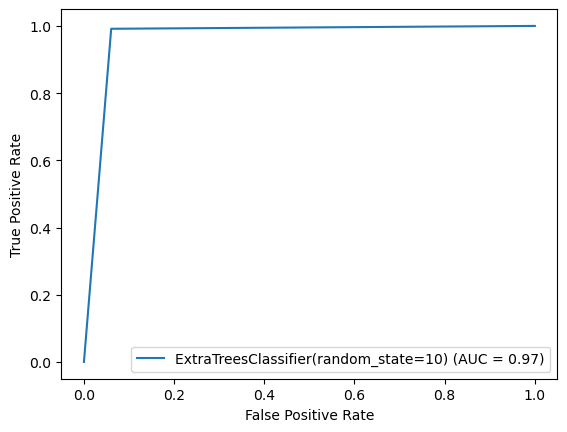

In [111]:
curve = metrics.RocCurveDisplay(fpr=fpr, tpr= tpr, roc_auc= roc_auc, estimator_name=Final_model)
curve.plot()

# Saving the best model

In [112]:
import joblib
joblib.dump(Final_model, "Bank_Fixed_deposit_prediction.pkl")

['Bank_Fixed_deposit_prediction.pkl']

# TEST DATASET

In [122]:
#Loading the test dataset
df_test=pd.read_csv('termdeposit_test_data.csv')
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [123]:
df_test.columns=['ID',
 'Age',
 'Job',
 'Marital Status',
 'Education',
 'Credit Default',
 'Balance',
 'Housing loan',
 'Personal loan',
 'Type of Contact',
 'Day',
 'Month',
 'Duration of contact',
 'No. of Contacts',
 'Pdays',
 'Previous Contacts',
 'Outcome']

In [124]:
df_test.drop(['ID'],axis=1,inplace=True)

# Encoding categorical column

In [125]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df_test.columns:
    if df_test[i].dtypes=='object':
        df_test[i] = OE.fit_transform(df_test[i].values.reshape(-1,1))

In [126]:
df_test

,Age,Job,Marital Status,Education,Credit Default,Balance,Housing loan,Personal loan,Type of Contact,Day,Month,Duration of contact,No. of Contacts,Pdays,Previous Contacts,Outcome
0,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,8.0,20,6,-1,0,3.0
1,78,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,1,5.0,372,1,-1,0,3.0
2,31,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,16,8.0,676,1,-1,0,3.0
3,57,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,13,8.0,65,2,-1,0,3.0
4,45,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,3,5.0,111,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4.0,1.0,2.0,0.0,45,0.0,0.0,0.0,28,1.0,148,4,-1,0,3.0
13560,54,1.0,1.0,0.0,0.0,2281,1.0,0.0,2.0,20,6.0,158,1,-1,0,3.0
13561,35,5.0,1.0,0.0,0.0,285,1.0,0.0,0.0,29,4.0,136,1,-1,0,3.0
13562,29,0.0,2.0,1.0,0.0,464,0.0,0.0,0.0,9,9.0,208,2,91,3,2.0


In [127]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  13564 non-null  int64  
 1   Job                  13564 non-null  float64
 2   Marital Status       13564 non-null  float64
 3   Education            13564 non-null  float64
 4   Credit Default       13564 non-null  float64
 5   Balance              13564 non-null  int64  
 6   Housing loan         13564 non-null  float64
 7   Personal loan        13564 non-null  float64
 8   Type of Contact      13564 non-null  float64
 9   Day                  13564 non-null  int64  
 10  Month                13564 non-null  float64
 11  Duration of contact  13564 non-null  int64  
 12  No. of Contacts      13564 non-null  int64  
 13  Pdays                13564 non-null  int64  
 14  Previous Contacts    13564 non-null  int64  
 15  Outcome              13564 non-null 

# Sclaing the test data

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_test = pd.DataFrame(scaler.fit_transform(df_test), columns = df_test.columns)
df_test

,Age,Job,Marital Status,Education,Credit Default,Balance,Housing loan,Personal loan,Type of Contact,Day,Month,Duration of contact,No. of Contacts,Pdays,Previous Contacts,Outcome
0,-0.838114,0.807551,-0.276592,-0.301053,-0.131336,-0.402389,0.893033,-0.429564,-0.704444,-0.089124,0.829938,-0.921849,1.058702,-0.418199,-0.297500,0.452163
1,3.499987,0.196760,-1.914173,-1.642982,-0.131336,0.463375,-1.119779,-0.429564,0.413763,-1.778340,-0.165753,0.439963,-0.574850,-0.418199,-0.297500,0.452163
2,-0.932421,0.502156,1.360988,1.040875,-0.131336,-0.393955,0.893033,-0.429564,1.531969,0.031534,0.829938,1.616074,-0.574850,-0.418199,-0.297500,0.452163
3,1.519549,0.807551,1.360988,-1.642982,-0.131336,0.784508,0.893033,-0.429564,0.413763,-0.330440,0.829938,-0.747754,-0.248140,-0.418199,-0.297500,0.452163
4,0.387871,-1.024823,-1.914173,-0.301053,-0.131336,-0.669352,-1.119779,2.327941,1.531969,-1.537023,-0.165753,-0.569789,-0.574850,-0.418199,-0.297500,0.452163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,-0.177969,-0.108636,-0.276592,1.040875,-0.131336,-0.426069,-1.119779,-0.429564,-0.704444,1.479434,-1.493340,-0.426644,0.405281,-0.418199,-0.297500,0.452163
13560,1.236630,-1.024823,-0.276592,-1.642982,-0.131336,0.299239,0.893033,-0.429564,1.531969,0.514168,0.166144,-0.387957,-0.574850,-0.418199,-0.297500,0.452163
13561,-0.555195,0.196760,-0.276592,-1.642982,-0.131336,-0.348218,0.893033,-0.429564,-0.704444,1.600092,-0.497650,-0.473070,-0.574850,-0.418199,-0.297500,0.452163
13562,-1.121034,-1.330219,1.360988,-0.301053,-0.131336,-0.290155,-1.119779,-0.429564,-0.704444,-0.813073,1.161835,-0.194517,-0.248140,0.483926,1.203911,-0.542830


# Loading the Saved Model

In [129]:
model= joblib.load("Bank_Fixed_deposit_prediction.pkl")

# Prediction

Predicting the test data using saved model

In [148]:
df_result=pd.DataFrame([model.predict(df_test)],index=['Subscribed'])
df_result

,0,1,2,3,4,5,6,7,8,9,...,13554,13555,13556,13557,13558,13559,13560,13561,13562,13563
Subscribed,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1


In [151]:
df_results = df_result.transpose()

In [152]:
df_results

,Subscribed
0,0
1,1
2,0
3,0
4,0
...,...
13559,0
13560,0
13561,0
13562,1


In [154]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Subscribed  13564 non-null  int32
dtypes: int32(1)
memory usage: 53.1 KB


In [155]:
df_results['Subscribed'] = df_results['Subscribed'].apply(lambda x: 'No' if x ==0 else 'Yes')

In [156]:
df_results

,Subscribed
0,No
1,Yes
2,No
3,No
4,No
...,...
13559,No
13560,No
13561,No
13562,Yes


In [161]:
df_test=pd.read_csv('termdeposit_test_data.csv')
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [167]:
df_test.shape

(13564, 17)

In [168]:
df_results.shape

(13564, 1)

# Fixed Deposit Subscription Results on Test Data

In [171]:
Subscription_Results = pd.concat([df_test, df_results], axis=1, join="inner")

In [172]:
Subscription_Results

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown,No
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown,Yes
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown,No
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown,No
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown,No
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown,No
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown,No
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,Yes
